In [1]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析モジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

#混同行列
from sklearn.metrics import confusion_matrix

In [6]:
import os 
print(os.getcwd())#ディレクトリの確認
os.chdir("D:")# ディレクトリの移動
print(os.getcwd())#ディレクトリの確認

C:\Users\andot\Downloads\pythonコード
D:\


In [8]:
taxi_da = pd.read_csv("bunsekiyo_data_dummied2.csv")
print(taxi_da.info())
print(taxi_da.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068062 entries, 0 to 1068061
Data columns (total 57 columns):
Unnamed: 0               1068062 non-null int64
profile_passport         1068062 non-null int64
dist_scale               1068062 non-null int64
id_bizday                1068062 non-null int64
STATUSTIME_e_day_2.0     1068062 non-null int64
STATUSTIME_e_day_3.0     1068062 non-null int64
STATUSTIME_e_day_4.0     1068062 non-null int64
STATUSTIME_e_day_5.0     1068062 non-null int64
STATUSTIME_e_day_6.0     1068062 non-null int64
STATUSTIME_e_day_7.0     1068062 non-null int64
STATUSTIME_e_day_8.0     1068062 non-null int64
STATUSTIME_e_day_9.0     1068062 non-null int64
STATUSTIME_e_day_10.0    1068062 non-null int64
STATUSTIME_e_day_11.0    1068062 non-null int64
STATUSTIME_e_day_12.0    1068062 non-null int64
STATUSTIME_e_day_13.0    1068062 non-null int64
STATUSTIME_e_day_14.0    1068062 non-null int64
STATUSTIME_e_day_15.0    1068062 non-null int64
STATUSTIME_e_day_16.0  

In [13]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 説明変数と目的変数
X = taxi_da[["mesh_code","D_45","D_90","D_135","D_180","D_225","D_270","D_315","D_360","hour"]]
Y = taxi_da['dist_scale']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.1)

# ロジスティック回帰
model = LogisticRegression(class_weight='balaced')

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.score(X_train_std,y_train))
print("test:", clf.score(X_test_std,y_test))

C:\Users\andot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


train: 0.371349179981274
test: 0.37673280782821417


In [14]:
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

# 決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=50)

tree_model.fit(X_train,y_train)

print("train:",tree_model.__class__.__name__ ,tree_model.score(X_train,y_train))
print("test:",tree_model.__class__.__name__ , tree_model.score(X_test,y_test))

train: DecisionTreeClassifier 0.4098281434051164
test: DecisionTreeClassifier 0.4188638216906768


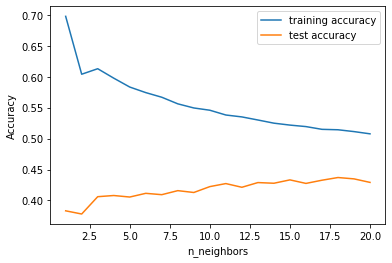

In [16]:
from sklearn.neighbors import  KNeighborsClassifier#K-NN

training_accuracy = []
test_accuracy =[]

neighbors_settings = range(1,21)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [15]:
#K-NN n_neighbers=20
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

pred_svc = clf.predict(X_test)
confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))
#9197
#3679  2407

train: KNeighborsClassifier 0.507716934972364
test: KNeighborsClassifier 0.4291927154117967
Confution matrix:
[[593 362 239]
 [466 421 319]
 [378 336 565]]


In [11]:
# SVM(標準化)
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
model = LinearSVC()
clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))



pred_svc = clf.predict(X_test_std)

confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))

C:\Users\andot\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


train: LinearSVC 0.3729477003370664
test: LinearSVC 0.366206371642927
Confution matrix:
[[1349  486 1180]
 [1342  489 1256]
 [1170  395 1530]]


In [10]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
clf = model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

C:\Users\andot\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train: RandomForestClassifier 0.6672103222065167
test: RandomForestClassifier 0.3970860063064043
